# Solving Representative Agent RBC Model with Dynare

Changing to higher order don't make for any significant difference. 

Here is the model with order 1 (liner perturnbation)

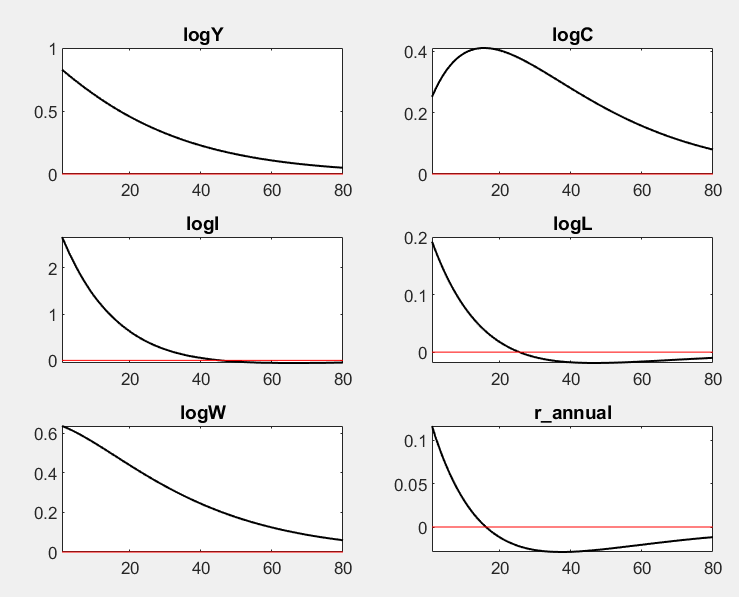

And here is the model with order 2 (quadratic)

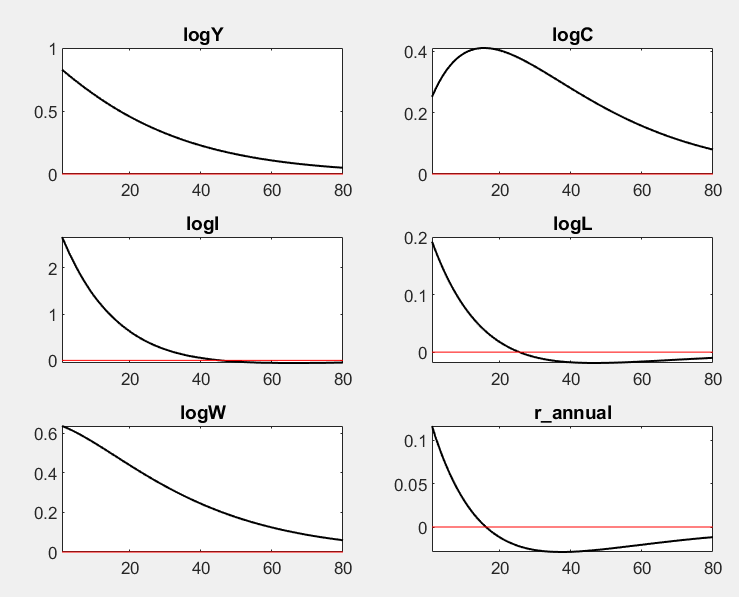

Setting $\alpha$ from 1/3 to 1/5: 

+ LogY declines slowlier
+ LogL and LogW decline slowlier 

+ Steady state results change


| STEADY-STATE RESULTS: | alpha = 1/3 | alpha = 1/2 |
|-----------------------|-------------|-------------|
| y                     | 1.02721     | 4.7482      |
| c                     | 0.783338    | 3.0573      |
| k                     | 9.75478     | 67.6363     |
| i                     | 0.243869    | 1.69091     |
| l                     | 0.333333    | 0.333333    |
| r                     | 0.035101    | 0.035101    |
| w                     | 2.05442     | 7.1223      |
| z                     | 0           | 0           |
| logY                  | 2.68443     | 155.777     |
| logC                  | -24.4191    | 111.753     |
| logI                  | -141.112    | 52.5265     |
| logL                  | -109.861    | -109.861    |
| logW                  | 71.9991     | 196.323     |
| r_annual              | 14.0404     | 14.0404     |



# RBS with habit formation 

We have the RBS model now with habit fomration, so our utility function looks like this:

$$
u(c_t,c_{t-1},N_t) = \frac{(c_t - c_{t-1})^{1-\sigma}}{1-\sigma} - \chi \frac{N_t^{1+ \frac{1}{\eta}}}{1+\frac{1}{\eta}}
$$

subject to the regular first order condition.

We can then write the Lagrangian

$$
\max_{c_t, N_t} E_0 \sum_{t=0}^\infty \beta^t \left( u(c_t,c_{t-1},N_t) + \lambda_t (w_t N_t + (r_t + (1-\delta))K_t - c_t + k_{t+1} \right)
$$

From the first-order conditions we get the new input equations for Dynare:


$$
\lambda_t = (c_t - b c_{t-1})^{-\sigma} - \beta b E_{t+1}\left( ( c_{t+1} - b c_t)^{-\sigma} \right) \\
\lambda_t w_t = \chi N^{\frac{1}{\eta}} \\ 
\lambda_t = \beta E_t \lambda_{t+1} (1 + r_{t+1} - \delta )
$$


We add the following code: 

`
model; 

	// 1. Euler equation for capital
	lambda = (c - bb*c(-1)) ^ (-1 / eeis)	- bbeta * bb * ((c(+1) - bb*c )^ (-1 / eeis));

    // 2. Shadow cost of capital 
    lambda = bbeta * lambda(+1) * (1 + r(+1) - ddelta);
	
	// 3. First order equation for labor-leisure
	lambda*w = cchi * (l ^ (1 / eeta));
    
    .....
    
 steady_state_model;

    ....
    
    lambda = ((1-bb) * c)^(-1 / eeis) * (1-bbeta*bb); 
	cchi		= w * lambda / (l ^ (1 / eeta));
`

The results with $b = .5$:

+ Wage rates, Consumption and Labor supply are a lot more sticky 



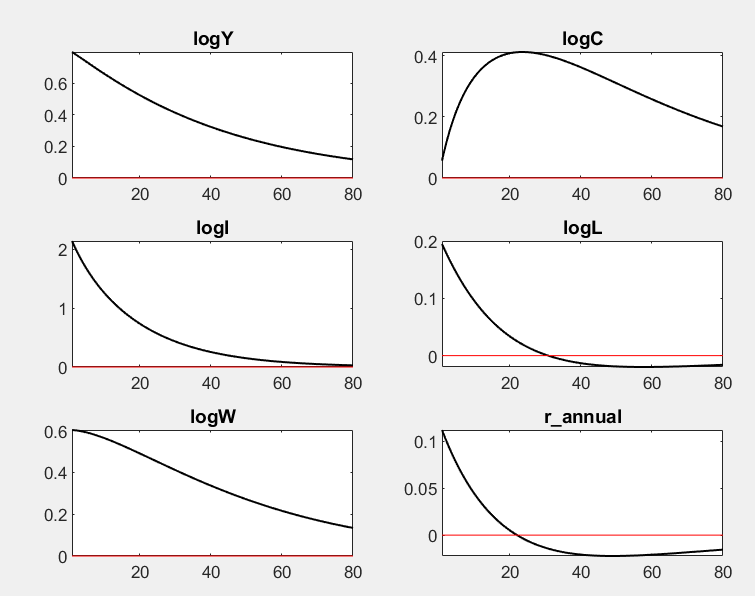

The results with $b = .8$:

+ Consumption jumps by less after the shock 

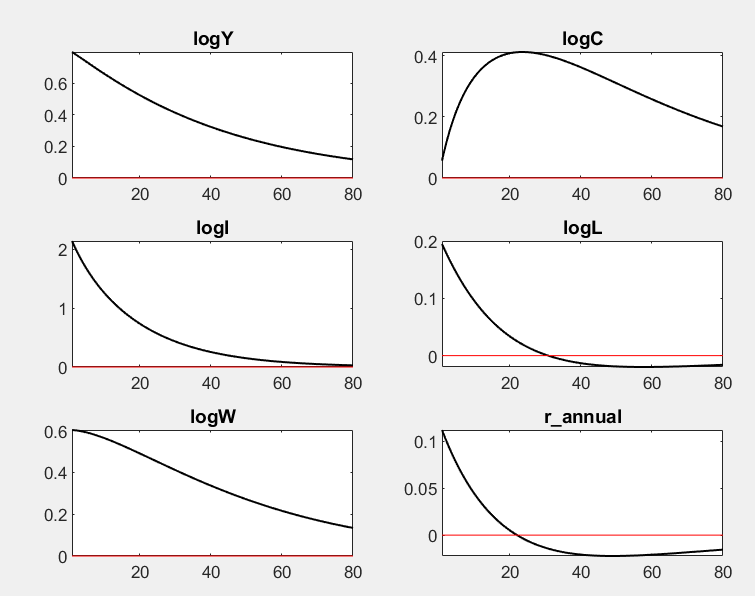
